## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Do not write your name on the assignment.

3. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

4. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

5. The assignment is worth 100 points, and is due on **Thursday, 26th January 2023 at 11:59 pm**. 

6. **Five points are properly formatting the assignment**. The breakdown is as follows:
- Must be an HTML file rendered using Quarto (1 pt). *If you have a Quarto issue, you must mention the issue & quote the error you get when rendering using Quarto in the comments section of Canvas, and submit the ipynb file.* 
- No name can be written on the assignment, nor can there be any indicator of the student’s identity—e.g. printouts of the working directory should not be included in the final submission  (1 pt)
- There aren’t excessively long outputs of extraneous information (e.g. no printouts of entire data frames without good reason, there aren’t long printouts of which iteration a loop is on, there aren’t long sections of commented-out code, etc.) (1 pt)
- Final answers of each question are written in Markdown cells (1 pt).
- There is no piece of unnecessary / redundant code, and no unnecessary / redundant text (1 pt)

## Multiple linear regression

A study was conducted on 97 men with prostate cancer who were due to receive a radical prostatectomy. The dataset *prostate.csv* contains data on 9 measurements made on these 97 men. The description of variables can be found [here](https://rafalab.github.io/pages/649/prostate.html):

### Training MLR
Fit a linear regression model with `lpsa` as the response and all the other variables as predictors. Write down the equation to predict `lpsa` based on the other eight variables.

*(2+2 points)*

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('prostate.csv')
train.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579819,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
1,-0.994252,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252
2,-0.510826,2.6912,74,-1.386294,0,-1.38629,7,20,-0.16252
3,-1.203973,3.2828,58,-1.386294,0,-1.38629,6,0,-0.16252
4,0.751416,3.4324,62,-1.386294,0,-1.38629,6,0,0.37156


In [3]:
ols_object = smf.ols(formula = 'lpsa~lcavol+lweight+age+lbph+svi+lcp+gleason+pgg45', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     20.86
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           2.24e-17
Time:                        11:12:06   Log-Likelihood:                -99.476
No. Observations:                  97   AIC:                             217.0
Df Residuals:                      88   BIC:                             240.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6693      1.296      0.516      0.607      -1.907       3.246
lcavol         0.5870      0.088      6.677      0.000       0.412       0.762
lweight        0.4545      0.170      2.673      0.009       0.117       0.792
age           -0.0196      0.011     -1.758      0.082      -0.042       0.003
lbph           0.1071      0.058      1.832      0.070      -0.009       0.223
svi            0.7662      0.244      3.136      0.002       0.281       1.252
lcp           -0.1055      0.091     -1.159      0.250      -0.286       0.075
gleason        0.0451      0.157      0.287      0.775      -0.268       0.358
pgg45          0.0045      0.004      1.024      0.309      -0.004       0.013
==============================================================================
Omnibus:                        0.235   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.026
Skew:                          -0.017   Prob(JB):                        0.987
Kurtosis:                       3.073   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

lpsa= 0.6693+0.5870*lcavol+0.4545*lweight-0.0196*age+0.1071*lbph+0.7662*svi-0.1055*lcp+0.0451*gleason+0.0045*pgg45

### Model significance
Is the overall regression significant at 5% level? Justify your answer.

*(2 points)*

Yes it is significant since the F value is below 0.05. 

### Coefficient interpretation
Interpret the coefficient of `svi`.

*(2 points)*

A one unit change in svi will result in a 0.7662 increase in lpsa while holding all other independent variables constant.

### Variable significance
Report the $p$-values for `gleason` and `age`. What do you conclude about the significance of these variables?

*(2+2 points)*

1) The P value of gleason is 0.775, which means it is not statistically significant at 0.05
2) The P value of gleason is 0.082, which means it is not statistically significant at 0.05

### Variable significance from confidence interval
What is the 95% confidence interval for the coefficient of `age`? Can you conclude anything about its significance based on the confidence interval?

*(2+2 points)*

In [ ]:
conf = model.conf_int(alpha=0.05)
print(conf)


1. The confidence interaval is (-0.041841,0.002566). Since there is a 0 in between the values, it means that the effect of age on the dependent variable is not statistically significant. 

### $p$-value
Fit a simple linear regression on `lpsa` against `gleason`. What is the $p$-value for `gleason`?

*(1+1 points)*

In [57]:
ols_objectSimple = smf.ols(formula = 'lpsa~gleason', data = train)
modelSimple = ols_objectSimple.fit()
modelSimple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     14.97
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           0.000200
Time:                        22:26:06   Log-Likelihood:                -143.96
No. Observations:                  97   AIC:                             291.9
Df Residuals:                      95   BIC:                             297.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5044      1.035     -1.453      0.149      -3.559       0.550
gleason        0.5898      0.152      3.869      0.000       0.287       0.892
==============================================================================
Omnibus:                        2.099   Durbin-Watson:                   0.245
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                1.526
Skew:                           0.178   Prob(JB):                        0.466
Kurtosis:                       3.501   Cond. No.                         65.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p value of gleason is 0.000. 

### Predictor significance in presence / absence of other predictors
Is the predictor `gleason` statistically significant in the model developed in the previous question *(B.1.6)*? 

Was `gleason` statistically significant in the model developed in the first question *(B.1.1)* with multiple predictors?

Did the statistical significance of `gleason` change in the absence of other predictors? Why or why not?

*(1+1+4 points)*

Gleason is statistically significant in the simple linear regression. However, it was not statistically significant in the multiple linear regression model. The statistical significance of gleason has changed with the absense of the other predictors. 

The reason for this is multicollinearity, meaning that gleason has a correlation with another regressor. 

### Prediction
Predict `lpsa` of a 65-year old man with `lcavol` = 1.35, `lweight` = 3.65, `lbph` = 0.1, `svi` = 0.22, `lcp` = -0.18, `gleason` = 6.75, and `pgg45` = 25 and find 95% prediction intervals.

*(2 points)*

In [5]:
data = {'lcavol': [1.35],'age' : 65,'lweight': [3.65],'lweight' : [3.65],'lbph' : [0.1],'svi' : 0.22,'lcp' : -0.18,
       'gleason': 6.75,
       'pgg45' : 25}

dataframe = pd.DataFrame(data)
prediction = model.predict(dataframe)
print(prediction[0])


0    2.460288
dtype: float64


In [14]:
intervals = model.get_prediction(dataframe)
intervals.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.460288,0.073052,2.315113,2.605463,1.044995,3.87558


The lpsa is 2.460287801901289. Confidence interval is (1.044995, 3.87558)

### Variable selection
Find the largest subset of predictors in the model developed in the first question *(B.1.1)*, such that their coefficients are zero, i.e., none of the predictors in the subset are statistically significant. 

Does the model $R$-squared change a lot if you remove the set of predictors identifed above from the model in the first question *(B.1.1)*?

**Hint:** You may use the `f_test()` method to test hypotheses.

*(4+1 points)*

In [15]:
Predictorsubset = ['lcavol', 'lweight', 'age', 'lbph','svi']

hypothesis = ' = '.join(Predictorsubset) + ' = 0'

f_test = model.f_test(hypothesis)

print(f_test)

<F test: F=array([[17.41143004]]), p=5.978359304883992e-12, df_denom=88, df_num=5>


In [17]:
ols_object = smf.ols(formula = 'lpsa~lcp+gleason+pgg45', data = train)
model_good = ols_object.fit()
model_good.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     14.14
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           1.15e-07
Time:                        20:57:20   Log-Likelihood:                -132.83
No. Observations:                  97   AIC:                             273.7
Df Residuals:                      93   BIC:                             284.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6584      1.329      1.248      0.215      -0.981       4.298
lcp            0.3832      0.092      4.176      0.000       0.201       0.566
gleason        0.1209      0.209      0.579      0.564      -0.294       0.536
pgg45          0.0030      0.006      0.500      0.618      -0.009       0.015
==============================================================================
Omnibus:                        0.017   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.992   Jarque-Bera (JB):                0.032
Skew:                          -0.006   Prob(JB):                        0.984
Kurtosis:                       2.912   Cond. No.                         511.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R squared dropped from 0.655 to 0.313. 

## Using MLR coefficients and variable transformation

The dataset *infmort.csv* gives the infant mortality of different countries in the world. The column `mortality` contains the infant mortality in deaths per 1000 births.

###  Data visualisation
Make the following plots:

1. a boxplot of log(`mortality`) against `region` *(note that a plot of log(`mortality`) against `region` better distinguishes the mortality among regions as compared to a plot of `mortality` against `region`*, 

2. a boxplot of `income` against `region`, and 

3. a scatter plot of `mortality` against `income`. 

What trends do you see in these plots? *Mention the trend separately for each plot.*

*(3+2 points)*

In [18]:
infmort = pd.read_csv('infmort.csv')


<AxesSubplot:xlabel='region', ylabel='log_mortality'>

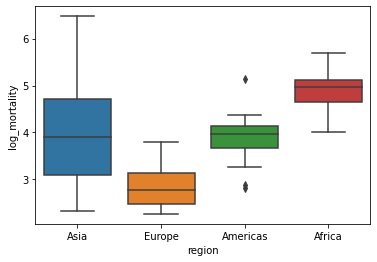

In [26]:
infmort['log_mortality'] = np.log(infmort['mortality'])
sns.boxplot(y = infmort.log_mortality, x = infmort.region)

Asia's infant mortality rate has a wide range. On the other hand Europe has low rate with a smaller range. Americans have a larger rate than Europe and two outliers. Africa has the largest rate. 

<AxesSubplot:xlabel='region', ylabel='income'>

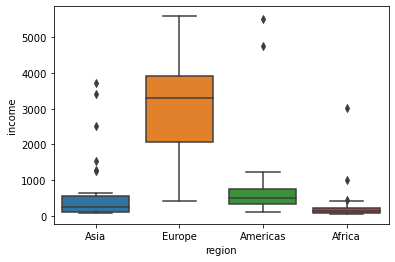

In [39]:
sns.boxplot(y = infmort.income, x = infmort.region)

Asia has a relatively lower income than Europe and it also has multiple outliers. Europe has a significantly larger income range while Amercias has a lower range than Europe but higher than Africa. The Americans has two outliers. Africa has the lowest income and the smallest range. However, it also has a few outliers. 

<AxesSubplot:xlabel='income', ylabel='mortality'>

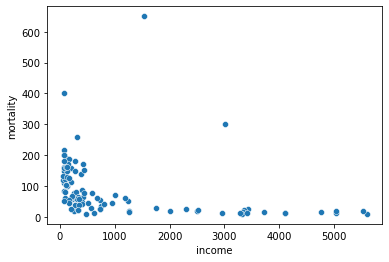

In [24]:
sns.scatterplot(y = infmort.mortality, x = infmort.income)

There are a lot more countries with lower income than higher. Countries with low income have higher mortality than countires with higher income. However, after 2000 as income value, mortality rate stabilizes and becomes constant. 

### Removing effect of predictor from response
Europe seems to have the lowest infant mortality, but it also has the highest per capita annual income. We want to see if  Europe still has the lowest mortality if we remove the effect of income from the mortality. We will answer this question with the following steps.

#### Variable transformation
Plot: 

1. `mortality` against `income`, 

2. log(`mortality`) against `income`,

3. `mortality` against log(`income`), and 

4. log(`mortality`) against log(`income`). 

Based on the plots, postulate an appropriate model to predict mortality as a function of income. *Print the model summary.*

*(2+4 points)*

<AxesSubplot:xlabel='income', ylabel='mortality'>

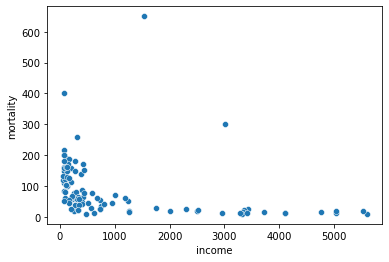

In [25]:
sns.scatterplot(y = infmort.mortality, x = infmort.income)

<AxesSubplot:xlabel='income', ylabel='log_mortality'>

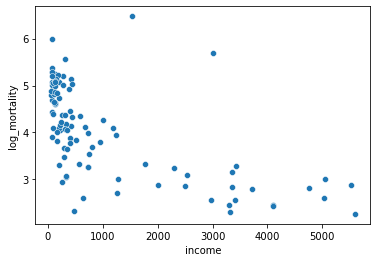

In [27]:
sns.scatterplot(y = infmort.log_mortality, x = infmort.income)

In [28]:
infmort['log_income'] = np.log(infmort['income'])

<AxesSubplot:xlabel='log_income', ylabel='mortality'>

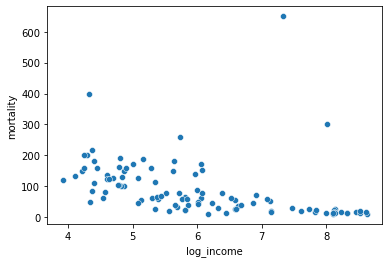

In [29]:
sns.scatterplot(y = infmort.mortality, x = infmort.log_income)

<AxesSubplot:xlabel='log_income', ylabel='log_mortality'>

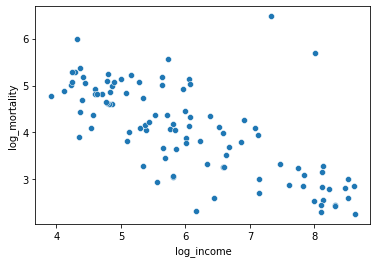

In [30]:
sns.scatterplot(y = infmort.log_mortality, x = infmort.log_income)

In [35]:
ols_object = smf.ols(formula = 'log_mortality~log_income', data = infmort)
model1 = ols_object.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_mortality   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     99.84
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           1.14e-16
Time:                        21:20:07   Log-Likelihood:                -104.34
No. Observations:                 101   AIC:                             212.7
Df Residuals:                      99   BIC:                             217.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1458      0.317     22.575      0.000       6.518       7.774
log_income    -0.5118      0.051     -9.992      0.000      -0.613      -0.410
==============================================================================
Omnibus:                       38.668   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.408
Skew:                           1.255   Prob(JB):                     7.93e-29
Kurtosis:                       7.945   Cond. No.                         29.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model update
Update the model developed in the previous question by adding `region` as a predictor. Print the model summary.

*(2 points)*

In [34]:
ols_object = smf.ols(formula = 'log_mortality~log_income+region', data = infmort)
model2 = ols_object.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_mortality   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           3.29e-19
Time:                        21:20:00   Log-Likelihood:                -91.189
No. Observations:                 101   AIC:                             192.4
Df Residuals:                      96   BIC:                             205.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.4030      0.358     17.871      0.000       5.692       7.114
region[T.Americas]    -0.6022      0.190     -3.166      0.002      -0.980      -0.225
region[T.Asia]        -0.7233      0.163     -4.431      0.000      -1.047      -0.399
region[T.Europe]      -1.2028      0.259     -4.647      0.000      -1.717      -0.689
log_income            -0.2994      0.067     -4.441      0.000      -0.433      -0.166
==============================================================================
Omnibus:                       44.959   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.758
Skew:                           1.428   Prob(JB):                     1.13e-38
Kurtosis:                       8.777   Cond. No.                         42.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Use the model developed in the previous question to compute `adjusted_mortality` for each observation in the data, where adjusted mortality is the mortality after removing the estimated effect of income. Make a boxplot of log(`adjusted_mortality`) against `region`.

*(4+2 points)*

In [36]:
infmort['adjusted_mortality'] = infmort['log_mortality'] - model2.params['log_income']*infmort['log_income']
infmort['log_adj_mortality'] = np.log(infmort['adjusted_mortality'])

<AxesSubplot:xlabel='region', ylabel='log_adj_mortality'>

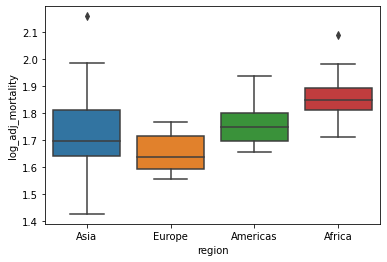

In [38]:
sns.boxplot(y = infmort.log_adj_mortality, x = infmort.region)

### Data visualisation after removing effect of predictor from response
From the plot in the previous question: 

1. Does Europe still seem to have the lowest mortality as compared to other regions after removing the effect of income from mortality? 

2. After adjusting for income, is there any change in the mortality comparison among different regions. Compare the plot developed in the previous question to the plot of `log(mortality)` against `region` developed earlier *(B.2.1)* to answer this question.

**Hint:** Do any African / Asian / American countries seem to do better than all the European countries with regard to mortality after adjusting for income? 

*(1+3 points)*

1. Europe still seems to have the lowest mortality rate as compared to other regions, however, the difference has decreased. 
2. After the adjustment some Asian, African, Americans countires seem to do better than European countries. Overall Asia's wide range has decreased. Americas and Africa have also significanlty reduced their mortality rate. 

## Variable transformations and interactions

The dataset *soc_ind.csv* contains the GDP per capita of some countries along with several social indicators.

### Training SLR
For a simple linear regression model predicting `gdpPerCapita`. Which predictor will provide the best model fit *(ignore categorical predictors)*? Let that predictor be $P$.

*(2 points)*

In [ ]:
soc=pd.read_csv("soc_ind.csv")
soc.head


In [42]:
soc.corrwith(soc.gdpPerCapita).abs()

Index                     0.073671
economicActivityFemale    0.052964
economicActivityMale      0.167231
gdpPerCapita              1.000000
illiteracyFemale          0.457012
illiteracyMale            0.471689
infantMortality           0.584060
lifeFemale                0.604029
lifeMale                  0.592267
dtype: float64

The predictors with the highest correlation is lifeFemale.  

In [47]:
ols_object = smf.ols(formula = 'gdpPerCapita~lifeFemale',data = soc)
model1= ols_object.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdpPerCapita   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     87.89
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           8.77e-17
Time:                        21:55:31   Log-Likelihood:                -1743.3
No. Observations:                 155   AIC:                             3491.
Df Residuals:                     153   BIC:                             3497.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.436e+04   1.06e+04     -7.002      0.000   -9.53e+04   -5.34e+04
lifeFemale  1398.2136    149.145      9.375      0.000    1103.564    1692.863
==============================================================================
Omnibus:                       59.449   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.079
Skew:                           1.551   Prob(JB):                     3.18e-37
Kurtosis:                       7.051   Cond. No.                         504.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linearity in relationship
Make a scatterplot of `gdpPerCapita` vs $P$. Does the relationship between `gdpPerCapita` and $P$ seem linear or non-linear?

*(1 + 2 points)*

<AxesSubplot:xlabel='lifeFemale', ylabel='gdpPerCapita'>

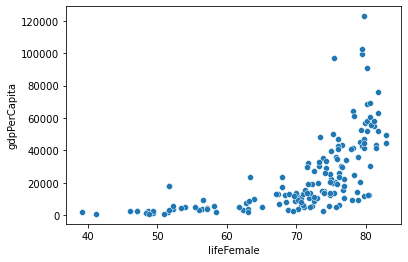

In [44]:
sns.scatterplot(y = soc.gdpPerCapita, x = soc.lifeFemale)

its non linear

### Variable transformation
If the relationship identified in the previous question is non-linear, identify and include transformation(s) of the predictor $P$ in the model to improve the model fit. 

Mention the predictors of the transformed model, and report the change in the $R$-squared value of the transformed model as compared to the simple linear regression model with only $P$.

*(4+4 points)*

In [46]:
ols_object = smf.ols(formula = 'gdpPerCapita~lifeFemale+I(lifeFemale**2)',data = soc)
model2= ols_object.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdpPerCapita   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     74.87
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           2.34e-23
Time:                        21:48:26   Log-Likelihood:                -1725.4
No. Observations:                 155   AIC:                             3457.
Df Residuals:                     152   BIC:                             3466.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.489e+05   5.22e+04      4.767      0.000    1.46e+05    3.52e+05
lifeFemale         -8952.5933   1649.317     -5.428      0.000   -1.22e+04   -5694.048
I(lifeFemale ** 2)    80.1589     12.731      6.296      0.000      55.007     105.311
==============================================================================
Omnibus:                       62.484   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.593
Skew:                           1.486   Prob(JB):                     5.70e-53
Kurtosis:                       8.332   Cond. No.                     2.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared increased from 0.365 to 0.496 on the new model. 

### Model visualisation
Plot the regression curve of the transformed model *(developed in the previous question)* over the scatterplot in (b) to visualize model fit. Also make the regression line of the simple linear regression model with only $P$ on the same plot.

*(3 + 1 points)*

/Users/abm7053/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


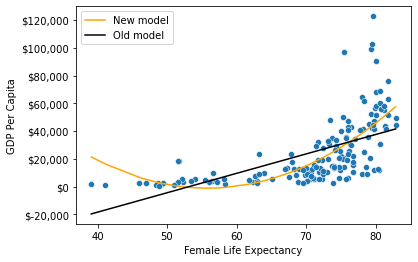

In [50]:
m2 = model2.predict(soc)
m1 = model1.predict(soc)

plot = sns.scatterplot(soc.lifeFemale, soc.gdpPerCapita, label='_nolegend_')

sns.lineplot(x = soc.lifeFemale, y = m2, color = 'orange', label='New model')
sns.lineplot(x = soc.lifeFemale, y = m1, color = 'black', label='Old model')

plt.xlabel('Female Life Expectancy')
plt.ylabel('GDP Per Capita')

plot.yaxis.set_major_formatter('${x:,.0f}')

plt.legend()

### Training MLR with qualitative predictor
Develop a model to predict `gdpPerCapita` with $P$ and `continent` as predictors. 

1. Interpert the intercept term. 

2. For a given value of $P$, are there any continents that **do not** have a signficant difference between their mean `gdpPerCapita` and that of Africa? If yes, then which ones, and why? If no, then why not? Consider a significance level of 5%.

*(4 + 4 points)*

In [53]:
ols_object = smf.ols(formula = 'gdpPerCapita~lifeFemale+continent',data = soc)
model3= ols_object.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdpPerCapita   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     25.43
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           1.28e-20
Time:                        22:04:22   Log-Likelihood:                -1723.6
No. Observations:                 155   AIC:                             3461.
Df Residuals:                     148   BIC:                             3483.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -7.208e+04   1.14e+04     -6.305      0.000   -9.47e+04   -4.95e+04
continent[T.Asia]           1324.7980   4805.099      0.276      0.783   -8170.667    1.08e+04
continent[T.Europe]         9167.0203   5785.650      1.584      0.115   -2266.134    2.06e+04
continent[T.North America] -1.446e+04   5947.502     -2.431      0.016   -2.62e+04   -2704.270
continent[T.Oceania]       -1.429e+04   6063.764     -2.357      0.020   -2.63e+04   -2307.304
continent[T.South America] -1.329e+04   6462.516     -2.056      0.042   -2.61e+04    -516.198
lifeFemale                  1393.4213    194.062      7.180      0.000    1009.931    1776.911
==============================================================================
Omnibus:                       67.873   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.081
Skew:                           1.701   Prob(JB):                     6.63e-51
Kurtosis:                       7.920   Cond. No.                         721.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Asia and Europe don't have a significant have a signficant difference between their mean `gdpPerCapita` and that of Africa and this is because their p value is above 0.05. 

### Variable interaction
The model developed in the previous question has a limitation. It assumes that the increase in mean `gdpPerCapita` with a unit increase in $P$ does not depend on the `continent`. 

1. Eliminate this limitation by including interaction of `continent` with $P$ in the model developed in the previous question. Print the model summary of the model with interactions.

2. Interpret the coefficient of any one of the interaction terms.
*(4 + 4 points)*

In [54]:
ols_object = smf.ols(formula = 'gdpPerCapita~lifeFemale+continent*lifeFemale',data = soc)
model4 = ols_object.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdpPerCapita   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     19.90
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           7.99e-24
Time:                        22:09:00   Log-Likelihood:                -1706.6
No. Observations:                 155   AIC:                             3437.
Df Residuals:                     143   BIC:                             3474.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -1.723e+04   1.53e+04     -1.129      0.261   -4.74e+04    1.29e+04
continent[T.Asia]                     -1.094e+05   2.63e+04     -4.156      0.000   -1.61e+05   -5.74e+04
continent[T.Europe]                   -2.774e+05   6.63e+04     -4.185      0.000   -4.08e+05   -1.46e+05
continent[T.North America]              -6.6e+04   4.88e+04     -1.352      0.178   -1.62e+05    3.05e+04
continent[T.Oceania]                  -1.367e+05   5.78e+04     -2.364      0.019   -2.51e+05   -2.24e+04
continent[T.South America]            -7830.3082   8.18e+04     -0.096      0.924   -1.69e+05    1.54e+05
lifeFemale                              428.5595    264.214      1.622      0.107     -93.711     950.830
continent[T.Asia]:lifeFemale           1755.1049    400.782      4.379      0.000     962.882    2547.328
continent[T.Europe]:lifeFemale         3944.6364    869.916      4.535      0.000    2225.080    5664.193
continent[T.North America]:lifeFemale   921.1328    667.359      1.380      0.170    -398.031    2240.297
continent[T.Oceania]:lifeFemale        1898.4382    812.766      2.336      0.021     291.851    3505.026
continent[T.South America]:lifeFemale   135.3138   1134.388      0.119      0.905   -2107.022    2377.650
==============================================================================
Omnibus:                       73.348   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.376
Skew:                           1.785   Prob(JB):                     8.82e-64
Kurtosis:                       8.676   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A one unit increase in female life expectancy in Europe results in 3944.636 increase in gdp per capita relative to Africa.

### Model visualisation
Use the model developed in the previous question to plot the regression lines for Africa, Asia, and Europe. Put `gdpPerCapita` on the vertical axis and $P$ on the horizontal axis. Use a legend to distinguish among the regression lines of the three continents.

*(4 points)*

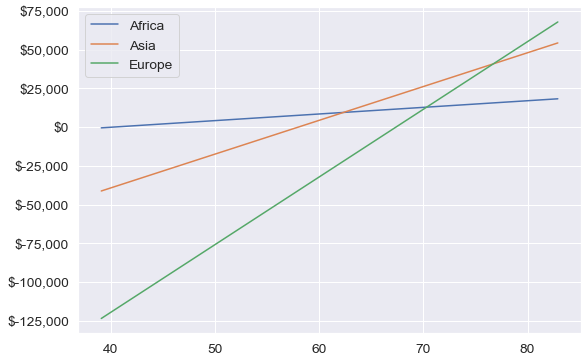

In [59]:
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
x = np.linspace(soc.lifeFemale.min(), soc.lifeFemale.max(), 1000)

ax = sns.lineplot(x = x, y = model4.params['lifeFemale']*x+model4.params['Intercept'], label = 'Africa')
sns.lineplot(x = x, y = (model4.params['lifeFemale'] + model4.params['continent[T.Asia]:lifeFemale'])*x+model4.params['continent[T.Asia]']+model4.params['Intercept'], label = 'Asia')
sns.lineplot(x = x, y = (model4.params['lifeFemale'] + model4.params['continent[T.Europe]:lifeFemale'])*x+model4.params['continent[T.Europe]']+model4.params['Intercept'], label = 'Europe')

ax.yaxis.set_major_formatter('${x:,.0f}')

plt.legend()

### Model interpretation
Based on the plot develop in the previous question, which continent has the highest increase in mean `gdpPerCapita` for a unit increase in $P$, and which one has the least? Justify your answer.

*(2+2 points)*

Highest increase is in Europe since the slope is larger. Lowest is Africa since the slope is lower and flatter. 